In [1]:
### Python Initialization ###
import sys
import numpy as np
import scipy as sp
from scipy.optimize import curve_fit

import pandas as pd
pd.options.display.max_colwidth = 100

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import matplotlib.colors as mcolors

from tqdm import tqdm
import datetime
import resource

sys.path.append('/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/')
from PMTanalysis import *
PMT = PMTanalyzer('/home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/configuration_led_window.ini')





___   ___  _______ .__   __.   ______   .__   __.        .___________.   __  __             _____    _____    ____  
\  \ /  / |   ____||  \ |  |  /  __  \  |  \ |  |        |           |  |  \/  |    /\     / ____|  |_   _| /  ___| 
 \  V  /  |  |__   |   \|  | |  |  |  | |   \|  |  _   _ `---|  |----`  | \  / |   /  \    | |  __    | |   | |      
  >   <   |   __|  |  . `  | |  |  |  | |  . `  | | \ | |    |  |       | |\/| |  / /\ \   | | |_ |   | |   | |      
 /  .  \  |  |____ |  |\   | |  `--`  | |  |\   | |  \| |    |  |       | |  | | / ____ \  | |__| |  _| |_  | |___  
/__/ \__\ |_______||__| \__|  \______/  |__| \__| |_|\__|    |__|       |_|  |_|/_/    \_\ \ _____| |_____| \_____|  
powered by Giovanni Volta, Chiara Capelli and Shingo Kazama (c)




Configuration file:  /home/gvolta/XENONnT/LedAnalysis/Commissioning/led_window/configuration_led_window.ini


In [3]:
!ls /dali/lgrandi/giovo/XENONnT/commissioning/Data/20200422/

Amplitude_007333.npz


In [4]:
folder = '/dali/lgrandi/giovo/XENONnT/commissioning/Data/20200422/'
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
data = np.load(folder + 'Amplitude_007333.npz')
np.load = np_load_old

In [18]:
amplitude = data['x']

In [23]:
ADC

array([-10])

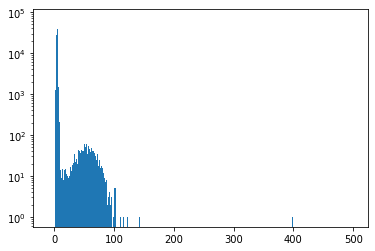

In [24]:
ADC = np.arange(-10, 500, 1)
plt.hist(amplitude[amplitude['channel']==0]['amplitude'], bins=ADC)
plt.yscale('log')

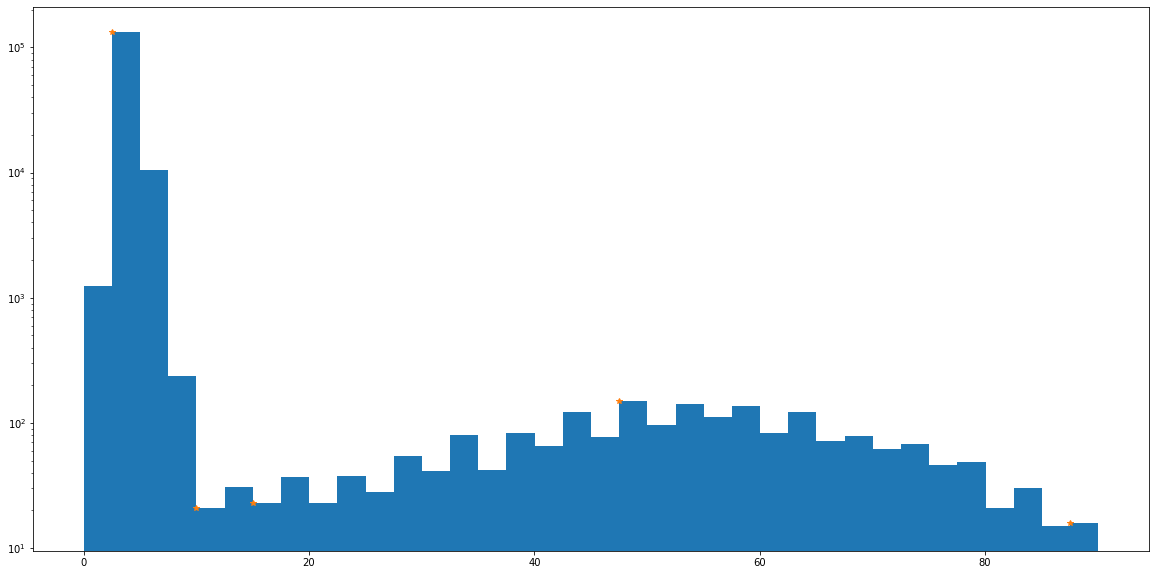

In [28]:
ch = 0
fit_input, binning, check = PMT.get_speinput(amplitude=amplitude, channel=ch)

plt.figure(figsize=(20,10))
H, B, _  = plt.hist(amplitude[amplitude['channel']==ch]['amplitude'], 
                    bins=binning,
                    label='SPE: %s'%(str(check)))
plt.plot(B[fit_input], H[fit_input], '*')

plt.yscale('log')
#plt.ylim(1e0)
plt.show()

(0.1, 374810.464361756)

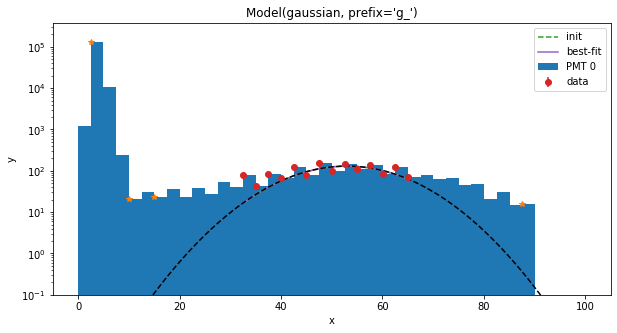

In [29]:
ch = 0
gauss, result_fit, fit_interval = PMT.get_sperough(amplitude=amplitude, channel=ch)
def gaussian(x,*p) :
    # A gaussian peak with:
    #   Peak height above background : p[0]
    #   Central value                : p[1]
    #   Standard deviation           : p[2]
    return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))

plt.figure(figsize=(10,5))
H, B, _  = plt.hist(amplitude[amplitude['channel']==ch]['amplitude'], 
                    bins=binning, label='PMT %s'%(str(ch)))

plt.plot(B[fit_input], H[fit_input], '*')
result_fit.plot_fit(show_init=True)

popt  = result_fit.best_values
N     = popt['g_amplitude']/(np.sqrt(2*np.pi)*popt['g_sigma'])
mu    = popt['g_center']
sigma = popt['g_sigma']

x = np.linspace(0,100, 100)
y = gaussian(x, N, mu, sigma)
plt.plot(x, y, 'k--')

plt.yscale('log')
plt.ylim(1e-1)